#### Machine Learning

In [22]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#df = pd.read_csv("../data/exosomes.raw_spectrum_1.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_380-1800.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")
df = pd.read_csv("../data/current_clean_spectrum.csv")

In [24]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,31.645788
1,201210-1-00,294,400.91116,201210-1,Normal,31.890799
2,201210-1-00,295,401.59454,201210-1,Normal,32.060592
3,201210-1-00,296,402.27789,201210-1,Normal,32.161890
4,201210-1-00,297,402.96127,201210-1,Normal,32.201418
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,-17.773341
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,-16.954783
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,-16.058237
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,-15.079158


In [25]:
def prepare_wavelength_df(df, absorbance_col, status_col='Status'):

    # Pivot the DataFrame to get wavelengths as columns and absorbance values
    wavelength_df = df.pivot(index='SpecID', columns='WaveNumber', values=absorbance_col).reset_index()
    wavelength_df.columns.name = None

    # Merge with the statuses based on SpecID
    statuses = df[['SpecID', status_col]].drop_duplicates()
    wavelength_df = pd.merge(wavelength_df, statuses, on='SpecID')

    # Set SpecID as the index
    wavelength_df = wavelength_df.set_index('SpecID')

    return wavelength_df

In [26]:
def evaluate_extra_trees(df):
    # Splitting the dataframe into features (X) and target variable (y)
    X = df.drop(['Status'], axis=1)
    y = df['Status']
    
    # Creating the Extra Trees classifier
    et = ExtraTreesClassifier(random_state=1234)
    
    # Using StratifiedKFold for classification tasks
    #cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
    cv = KFold(n_splits=10, shuffle=True, random_state=1234)

    
    # Getting cross-validation scores
    scores = cross_val_score(et, X, y, cv=cv, scoring='accuracy')
    
    # Displaying the results
    print(f'{et.__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

In [27]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [28]:
wavelength_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,31.645788,31.890799,32.060592,32.161890,32.201418,32.185899,32.122059,32.016620,31.876308,31.707846,...,-10.110205,-10.777774,-11.616896,-12.643726,-13.874421,-15.325136,-17.012028,-18.951251,-21.158961,Normal
201210-1-01,42.196054,42.922684,43.593684,44.214403,44.790193,45.326403,45.828383,46.301484,46.751056,47.182449,...,-13.501219,-13.220270,-12.939614,-12.661874,-12.389675,-12.125640,-11.872393,-11.632560,-11.408763,Normal
201210-1-02,138.865467,133.819502,129.408292,125.595054,122.343009,119.615374,117.375368,115.586210,114.211117,113.213310,...,-34.658174,-34.538639,-34.402384,-34.255415,-34.103739,-33.953362,-33.810290,-33.680531,-33.570091,Normal
201210-1-03,232.772008,232.126129,231.411228,230.634073,229.801431,228.920069,227.996754,227.038255,226.051337,225.042769,...,-61.593670,-61.351792,-60.916246,-60.267221,-59.384911,-58.249507,-56.841200,-55.140182,-53.126644,Normal
201210-1-04,145.574231,137.246285,129.875220,123.408835,117.794931,112.981307,108.915764,105.546101,102.820118,100.685616,...,-59.897214,-59.759990,-59.519263,-59.174454,-58.724981,-58.170266,-57.509728,-56.742787,-55.868862,Normal


Show the performance of the current approach.

In [29]:
evaluate_extra_trees(wavelength_df)

ExtraTreesClassifier Cross-Validation Accuracy: 0.9366 +/- 0.0088


Fit an Extra Trees Classifier on the whole dataset.

In [30]:
# Splitting the dataframe into features (X) and target variable (y)
X = wavelength_df.drop(['Status'], axis=1)
y = wavelength_df['Status']

# Creating the Extra Trees classifier
et = ExtraTreesClassifier(random_state=1234)

et = ExtraTreesClassifier(random_state=1234)
et.fit(X, y)

ExtraTreesClassifier(random_state=1234)

In [31]:
feature_names = X.columns
importances = et.feature_importances_

# Creating a DataFrame from the feature names and importance
wavenumber_importance_df = pd.DataFrame({
    'WaveNumber': feature_names,
    'Importance': importances
})

wavenumber_importance_df

,WaveNumber,Importance
0,400.22778,0.000384
1,400.91116,0.000531
2,401.59454,0.000632
3,402.27789,0.001418
4,402.96127,0.000535
...,...,...
2044,1797.0387,0.000693
2045,1797.722,0.000781
2046,1798.4055,0.000241
2047,1799.0889,0.000878


In [32]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,31.645788
1,201210-1-00,294,400.91116,201210-1,Normal,31.890799
2,201210-1-00,295,401.59454,201210-1,Normal,32.060592
3,201210-1-00,296,402.27789,201210-1,Normal,32.161890
4,201210-1-00,297,402.96127,201210-1,Normal,32.201418
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,-17.773341
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,-16.954783
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,-16.058237
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,-15.079158


Seaborn was using different axes so I used Matplotlib instead.

Text(0.5, 1.0, 'Feature Importance and Average Spectra of each Status')

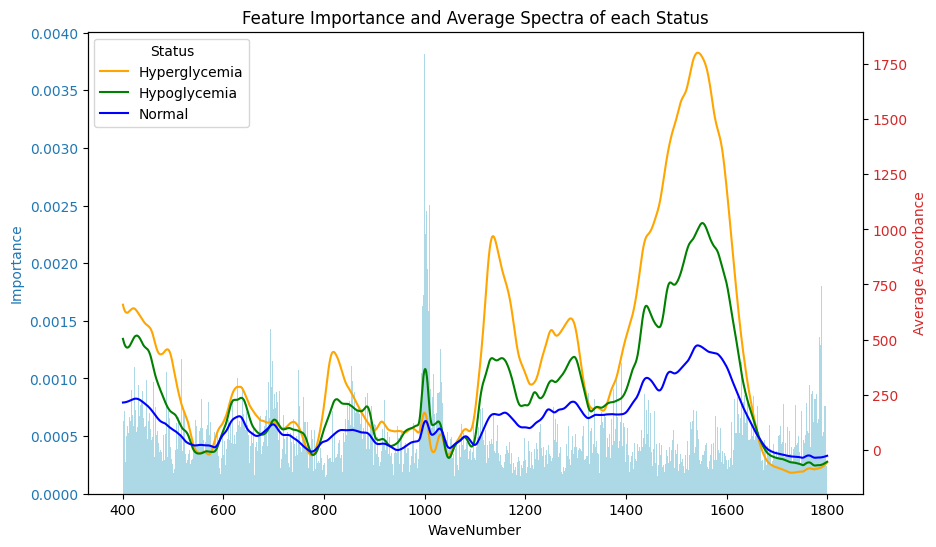

In [33]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis for Feature Importance
colors = ['lightblue'] * len(wavenumber_importance_df['WaveNumber'])
ax1.bar(wavenumber_importance_df['WaveNumber'], wavenumber_importance_df['Importance'], color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Calculate average absorbance by WaveNumber and Status
avg_absorbance = df.groupby(['WaveNumber', 'Status'])['Absorbance'].mean().reset_index()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot average absorbance line plot on the second axis for each status
for status, group in avg_absorbance.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Average Absorbance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Feature Importance and Average Spectra of each Status')

# # Show the plot
# plt.tight_layout()
# plt.show()

#### **Cross-Val Importance**

Training the model on the whole dataset may be misleading, lets look at the average feature importance of each WaveNumber across the 10 folds.

In [34]:
from sklearn.model_selection import KFold

# Splitting the dataframe into features (X) and target variable (y)
X = wavelength_df.drop(['Status'], axis=1)
y = wavelength_df['Status']

# Creating the KFold object
cv = KFold(n_splits=10, shuffle=True, random_state=1234)

# Initialising an array to store feature importances across all folds
feature_importances = np.zeros(X.shape[1])

# Looping through each split
for train_index, test_index in cv.split(X):
    # Splitting the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Creating and fitting the Extra Trees classifier
    et = ExtraTreesClassifier(random_state=1234)
    et.fit(X_train, y_train)
    
    # Accumulating the feature importances
    feature_importances += et.feature_importances_

# Averaging the feature importances across all folds
feature_importances /= 10

# Creating a DataFrame from the feature names and their average importance
feature_names = X.columns
wavenumber_importance_df = pd.DataFrame({
    'WaveNumber': feature_names,
    'Importance': feature_importances
})

# Optionally, you might want to sort the DataFrame based on the importances
wavenumber_importance_df = wavenumber_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the DataFrame
wavenumber_importance_df

,WaveNumber,Importance
877,999.54443,0.003593
876,998.86102,0.003010
882,1002.9613,0.002919
885,1005.0114,0.002569
880,1001.5945,0.002400
...,...,...
1022,1098.6333,0.000217
1110,1158.7699,0.000214
1155,1189.5216,0.000213
1115,1162.1868,0.000203


Text(0.5, 1.0, 'Feature Importance and Average Spectra of each Status')

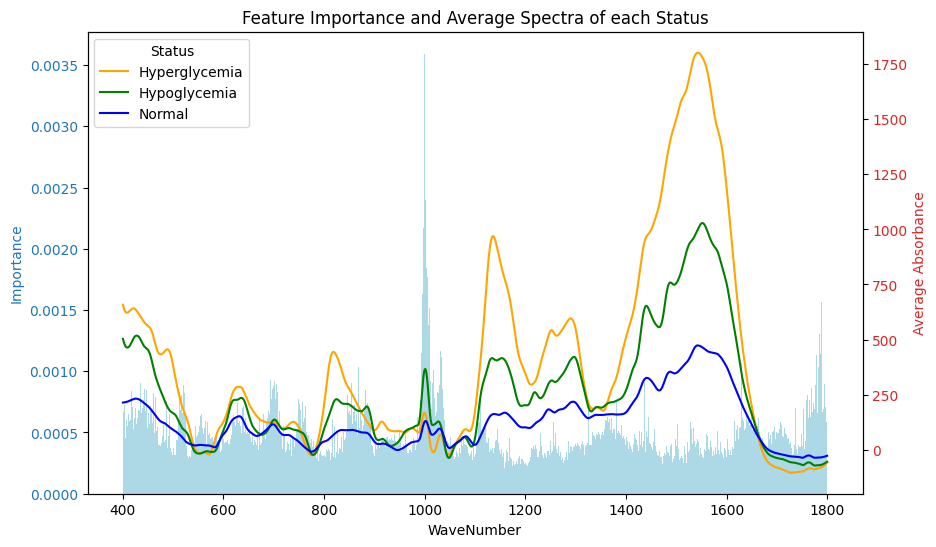

In [35]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis for Feature Importance
colors = ['lightblue'] * len(wavenumber_importance_df['WaveNumber'])
ax1.bar(wavenumber_importance_df['WaveNumber'], wavenumber_importance_df['Importance'], color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Calculate average absorbance by WaveNumber and Status
avg_absorbance = df.groupby(['WaveNumber', 'Status'])['Absorbance'].mean().reset_index()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot average absorbance line plot on the second axis for each status
for status, group in avg_absorbance.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Average Absorbance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Feature Importance and Average Spectra of each Status')

# # Show the plot
# plt.tight_layout()
# plt.show()